
ROC-AUC Score for Adversarial Validation: 0.5316
✅ No significant data drift detected.


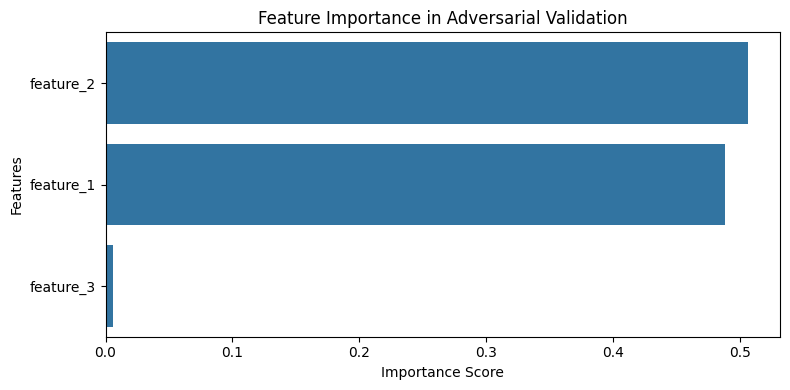

In [26]:
# Task: Implementing Adversarial Validation for Data Drift

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate train and test datasets with some drift
np.random.seed(42)

train_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=1000),
    'feature_2': np.random.normal(loc=5, scale=2, size=1000),
    'feature_3': np.random.randint(0, 2, size=1000)
})

test_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=0.3, scale=1.1, size=1000),
    'feature_2': np.random.normal(loc=6, scale=2.2, size=1000),
    'feature_3': np.random.randint(0, 2, size=1000)
})

# Add target label: 0 for train, 1 for test
train_data['is_test'] = 0
test_data['is_test'] = 1

# Combine datasets
combined = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
X = combined.drop(columns='is_test')
y = combined['is_test']

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train classifier to distinguish train vs test
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)

# Output results
print(f"\nROC-AUC Score for Adversarial Validation: {roc_auc:.4f}")
if roc_auc > 0.75:
    print("⚠️ Significant data drift detected.")
elif roc_auc > 0.55:
    print("⚠️ Moderate drift detected.")
else:
    print("✅ No significant data drift detected.")

# Feature importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance in Adversarial Validation")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
